In [1]:
# Project on Face Recognition


In [1]:
# Specifying the folder where images are present
TrainingImagePath="C:/Users/HP/Desktop/IMARTICUS/DL/FR/Train"
validationImagePath = "C:/Users/HP/Desktop/IMARTICUS/DL/FR/Validation"

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#____________base model
train_datagen = ImageDataGenerator(rescale=1./225)
 
test_datagen = ImageDataGenerator(rescale=1./225)
 

In [4]:
# Generating the Training Data
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                 target_size=(64, 64),
                                                 batch_size=20,
                                                 class_mode='categorical')

Found 139 images belonging to 11 classes.


In [7]:
# Generating the Validation Data
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                  target_size=(64, 64),
                                                  batch_size=20,
                                                  class_mode='categorical')

Found 59 images belonging to 11 classes.


In [8]:
##libraries & model
#'''______________________Create CNN deep learning model'''

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [10]:
#'''Initializing the Convolutional Neural Network'''
classifier= Sequential()
 

In [12]:
#model
# ''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red,
# Green and Blue components of pixels
classifier.add(Convolution2D(32, kernel_size=(3, 3),
                             input_shape=(64,64,3), activation='relu'))

In [13]:
#'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))
#'''________________ ADDITIONAL LAYER of CONVOLUTION for better accuracy '''
classifier.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
 
classifier.add(MaxPool2D(pool_size=(2,2)))
#'''________________ ADDITIONAL LAYER of CONVOLUTION for better accuracy '''
classifier.add(Convolution2D(64, kernel_size=(3, 3), activation='relu')) 

In [14]:
'''# STEP--3 FLattening'''
classifier.add(Flatten()) 

In [15]:
'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(11, activation='softmax'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)             

In [16]:
'''Compiling the CNN'''

classifier.compile(loss='categorical_crossentropy', 
                   optimizer = 'adam', metrics=["accuracy"])
 

In [17]:
# Starting the model training
history = classifier.fit_generator(training_set, epochs=20, 
                         validation_data=validation_set)

C:\Users\HP\AppData\Local\Temp\ipykernel_9688\174919611.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs=20,


Epoch 1/20
7/7 [==============================] - 6s 664ms/step - loss: 2.4333 - accuracy: 0.0791 - val_loss: 2.3422 - val_accuracy: 0.1525
Epoch 2/20
7/7 [==============================] - 3s 421ms/step - loss: 2.3164 - accuracy: 0.1439 - val_loss: 2.2838 - val_accuracy: 0.1525
Epoch 3/20
7/7 [==============================] - 3s 419ms/step - loss: 2.2657 - accuracy: 0.1511 - val_loss: 2.2466 - val_accuracy: 0.1695
Epoch 4/20
7/7 [==============================] - 3s 468ms/step - loss: 2.1708 - accuracy: 0.1942 - val_loss: 2.1787 - val_accuracy: 0.1695
Epoch 5/20
7/7 [==============================] - 3s 477ms/step - loss: 1.9857 - accuracy: 0.2806 - val_loss: 2.1426 - val_accuracy: 0.2203
Epoch 6/20
7/7 [==============================] - 3s 397ms/step - loss: 1.7867 - accuracy: 0.3813 - val_loss: 2.0314 - val_accuracy: 0.2542
Epoch 7/20
7/7 [==============================] - 3s 440ms/step - loss: 1.4328 - accuracy: 0.5108 - val_loss: 2.0056 - val_accuracy: 0.3220
Epoch 8/20
7/7 [====

In [18]:
#Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [19]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

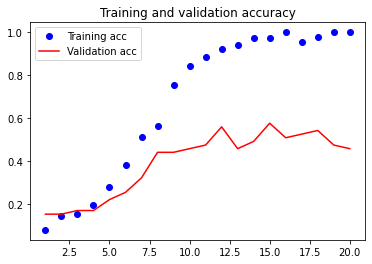

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


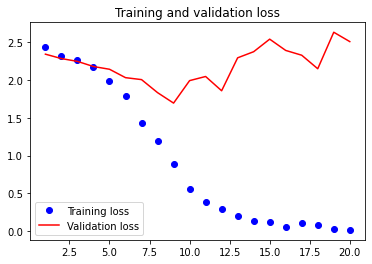

In [21]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
#___________________Model 2_____________________
# Specifying the folder where images are present
TrainingImagePath="C:/Users/HP/Desktop/IMARTICUS/DL/FR/Train"
validationImagePath = "C:/Users/HP/Desktop/IMARTICUS/DL/FR/Validation"


In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
#Adding parameters in the ImageDatagenerator
train_datagen = ImageDataGenerator(rescale=1./225, shear_range=0.5, 
                                   zoom_range=0.5, width_shift_range=0.2,
                                   height_shift_range=0.2)
 

In [25]:
# No transformations are done on the testing images
test_datagen = ImageDataGenerator(rescale=1./225)
 

In [26]:
# Generating the Training Data
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                 target_size=(64, 64),
                                                 batch_size=20,
                                                 class_mode='categorical')

Found 139 images belonging to 11 classes.


In [27]:
# Generating the Validation Data
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                  target_size=(64, 64),
                                                  batch_size=20,
                                                  class_mode='categorical')

Found 59 images belonging to 11 classes.


In [28]:
'''______________________Create CNN deep learning model'''

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [29]:
'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

In [30]:
 
'''Convolution
'''
classifier.add(Convolution2D(32, kernel_size=(3, 3), input_shape=(64,64,3), activation='relu'))
 

In [31]:
'''MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

In [32]:
'''ADDITIONAL LAYER of CONVOLUTION for better accuracy '''
classifier.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
 

In [33]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [34]:
'''ADDITIONAL LAYER of CONVOLUTION for better accuracy '''
classifier.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))

In [35]:
 
'''FLattening'''
classifier.add(Flatten())

In [36]:
 
'''Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu')) # hidden layer
 

In [37]:
classifier.add(Dense(11, activation='softmax')) # output layer


In [39]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 9216)             

In [40]:
'''Compiler'''

classifier.compile(loss='categorical_crossentropy', 
                   optimizer = 'adam', metrics=["accuracy"])

In [41]:
# Starting the model training
history = classifier.fit_generator(training_set, epochs=100, 
                         validation_data=validation_set)

C:\Users\HP\AppData\Local\Temp\ipykernel_9688\2176159273.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs=100,


Epoch 1/100
7/7 [==============================] - 5s 605ms/step - loss: 2.4017 - accuracy: 0.0647 - val_loss: 2.3171 - val_accuracy: 0.1525
Epoch 2/100
7/7 [==============================] - 3s 481ms/step - loss: 2.3501 - accuracy: 0.1439 - val_loss: 2.3131 - val_accuracy: 0.1525
Epoch 3/100
7/7 [==============================] - 3s 449ms/step - loss: 2.3383 - accuracy: 0.1439 - val_loss: 2.3092 - val_accuracy: 0.1525
Epoch 4/100
7/7 [==============================] - 3s 491ms/step - loss: 2.3203 - accuracy: 0.1439 - val_loss: 2.2822 - val_accuracy: 0.1525
Epoch 5/100
7/7 [==============================] - 4s 517ms/step - loss: 2.3117 - accuracy: 0.1439 - val_loss: 2.2642 - val_accuracy: 0.1525
Epoch 6/100
7/7 [==============================] - 3s 455ms/step - loss: 2.2879 - accuracy: 0.1439 - val_loss: 2.2356 - val_accuracy: 0.1525
Epoch 7/100
7/7 [==============================] - 3s 453ms/step - loss: 2.2729 - accuracy: 0.1511 - val_loss: 2.1988 - val_accuracy: 0.2542
Epoch 8/100
7

In [42]:
#Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


In [43]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

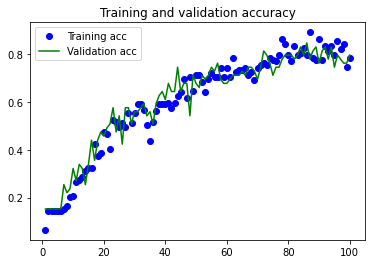

<Figure size 432x288 with 0 Axes>

In [44]:
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

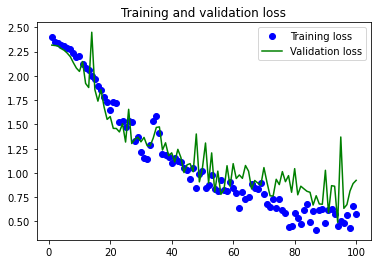

In [45]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [46]:
#___________________Pretrained model

#Instantiating the VGG16 convolutional base
# ImageNet dataset (1.4 million labeled images and 1,000 different classes
from keras.applications import VGG16


In [47]:
conv_base = VGG16(weights='imagenet', include_top=False,
                  input_shape=(150, 150, 3))


58889256/58889256 [==============================] - 9s 0us/step


In [48]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [49]:
#Extracting features using the pretrained convolutional base
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [69]:
# Specifying the folder where images are present
TrainingImagePath="C:/Users/HP/Desktop/IMARTICUS/DL/FR/Train"
validationImagePath = "C:/Users/HP/Desktop/IMARTICUS/DL/FR/Validation"


In [70]:
datagen = ImageDataGenerator(rescale=1./255)


In [71]:
batch_size = 20


In [72]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels


In [73]:
'''Note that because generators yield data indefinitely in a loop, you must 
break after every image has been seen once.'''


'Note that because generators yield data indefinitely in a loop, you must \nbreak after every image has been seen once.'

In [74]:

#Following three codes takes few minutes each as it is converting images into
#arrays
train_features, train_labels = extract_features(TrainingImagePath, 139)

Found 139 images belonging to 11 classes.
1/1 [==============================] - 2s 2s/step


In [75]:
validation_features, validation_labels = extract_features(validationImagePath, 59)

Found 59 images belonging to 11 classes.
1/1 [==============================] - 2s 2s/step


In [101]:
train_features.shape


(139, 4, 4, 512)

In [102]:
train_features = np.reshape(train_features, (139, 4*4* 512))


In [103]:
train_features.shape 

(139, 8192)

In [104]:
validation_features.shape

(59, 8192)

In [105]:
validation_features = np.reshape(validation_features, (59, 4*4* 512))

In [106]:
validation_features.shape

(59, 8192)

In [107]:
#Preparing the response data
train_labels.shape #139,
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels)
train_labels_cat.shape #139, 11

(139, 11)

In [108]:
validation_labels.shape #59,
valid_labels_cat = to_categorical(validation_labels)
valid_labels_cat.shape #59, 11

(59, 11)

In [109]:
#Defining and training the densely connected classifier
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(11, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc']) #'''Compiling the CNN'''


In [110]:
history = model.fit(train_features, train_labels_cat,epochs=30,batch_size=20,
                    validation_data=(validation_features, valid_labels_cat))


Epoch 1/30
7/7 [==============================] - 1s 89ms/step - loss: 2.7526 - acc: 0.2302 - val_loss: 1.6378 - val_acc: 0.4746
Epoch 2/30
7/7 [==============================] - 0s 27ms/step - loss: 1.4117 - acc: 0.6187 - val_loss: 1.2280 - val_acc: 0.6271
Epoch 3/30
7/7 [==============================] - 0s 26ms/step - loss: 0.8330 - acc: 0.6906 - val_loss: 0.7616 - val_acc: 0.8136
Epoch 4/30
7/7 [==============================] - 0s 21ms/step - loss: 0.5242 - acc: 0.8417 - val_loss: 0.6192 - val_acc: 0.7966
Epoch 5/30
7/7 [==============================] - 0s 21ms/step - loss: 0.2830 - acc: 0.9496 - val_loss: 0.5372 - val_acc: 0.8475
Epoch 6/30
7/7 [==============================] - 0s 19ms/step - loss: 0.2095 - acc: 0.9568 - val_loss: 0.4751 - val_acc: 0.8136
Epoch 7/30
7/7 [==============================] - 0s 20ms/step - loss: 0.1702 - acc: 0.9424 - val_loss: 0.4182 - val_acc: 0.8475
Epoch 8/30
7/7 [==============================] - 0s 20ms/step - loss: 0.1015 - acc: 0.9856 - val

In [111]:

#Plotting the results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


In [112]:
epochs = range(1, len(acc) + 1)


<Figure size 432x288 with 0 Axes>

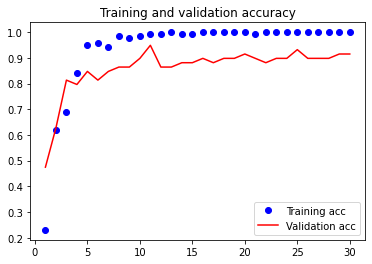

<Figure size 432x288 with 0 Axes>

In [113]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

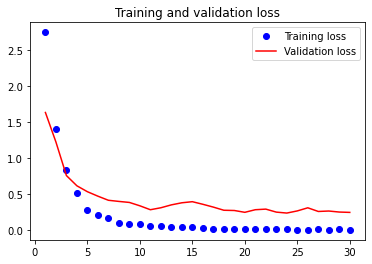

In [114]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
